## 3.2 - Download and Read the Data

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
data = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv"

In [48]:
!wget  $data -O data-week-3.csv

--2023-09-24 10:42:33--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘data-week-3.csv’

data-week-3.csv     100%[===================>] 954.59K  --.-KB/s    in 0.07s   

2023-09-24 10:42:33 (14.1 MB/s) - ‘data-week-3.csv’ saved [977501/977501]



In [49]:
df = pd.read_csv('data-week-3.csv')

In [50]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [51]:
df.columns=df.columns.str.lower().str.replace(' ','_')
strings = list(df.dtypes[df.dtypes=='object'].index)
for col in strings:
  df[col]= df[col].str.lower().str.replace(' ','_')

In [52]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [53]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [54]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [55]:
tc.isnull().sum()

11

In [56]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [83]:
df.totalcharges = df.totalcharges.fillna(0)

In [84]:
df.totalcharges.isnull().sum()

0

In [58]:
df.churn = (df.churn=='yes').astype(int)

In [59]:
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

## 3.3- Setting up the valdation framework

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [87]:
df_train, df_val =  train_test_split(df_full_train, test_size=0.25,random_state=1)

In [88]:
len(df_train),len(df_val),len(df_test)

(4225, 1409, 1409)

In [89]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [90]:
del (df_train['churn'])
del (df_val['churn'])
del (df_test['churn'])

In [91]:
df_train = df_train.reset_index(drop=True)
df_val= df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

In [92]:
df_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,yes,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15
1,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,yes,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55
2,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65
3,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,no,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10
4,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50


## 3.4 - Exploratory Data Analysis

In [25]:
df_full_train = df_full_train.reset_index(drop=True)

In [26]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        8
churn               0
dtype: int64

In [27]:
df_full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [28]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate,2)

0.27

In [29]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [30]:
numerical=['tenure','monthlycharges','totalcharges']

In [31]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [32]:
categorical = [ 'gender', 'seniorcitizen', 'partner', 'dependents',
        'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [33]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## 3.5 - Feature Importance: Churn Rate And Risk Ratio

**1- Difference**

Global-Group > 0 => the group is less likely to churn
Global-Group < 0 => the group is more likely to churn

**2- Risk Ratio**

Risk = Group / Global < 1 => the group is less likely to churn
Risk = Group / Global > 1 => the group is more likely to churn

Churn rate

In [ ]:
global_churn = df_full_train.churn.mean()

In [ ]:
global_churn

0.26996805111821087

In [ ]:
df_full_train.partner.value_counts()

no     2932
yes    2702
Name: partner, dtype: int64

In [ ]:
churn_partner = df_full_train[df_full_train.partner=='yes'].churn.mean()

In [ ]:
churn_partner

0.20503330866025166

In [ ]:
churn_no_partner = df_full_train[df_full_train.partner=='no'].churn.mean()
churn_no_partner

0.3298090040927694

In [ ]:
global_churn- churn_partner

0.06493474245795922

In [ ]:
global_churn- churn_no_partner

-0.05984095297455855

Risk Ratio

In [ ]:
churn_partner/global_churn

0.7594724924338315

In [ ]:
churn_no_partner/global_churn

1.2216593879412643

In [ ]:
from IPython.display import display

In [ ]:
for c in categorical:
  df_group = df_full_train.groupby(c).churn.agg(['mean','count'])
  df_group['diff'] = global_churn- df_group['mean']
  df_group['risk'] = df_group['mean']/ global_churn
  display(df_group)

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,-0.006856,1.025396
male,0.263214,2838,0.006755,0.974980


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,0.027698,0.897403
1,0.413377,912,-0.143409,1.531208


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,-0.059841,1.221659
yes,0.205033,2702,0.064935,0.759472


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,-0.043792,1.162212
yes,0.165666,1666,0.104302,0.613651


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,0.028652,0.893870
yes,0.273049,5087,-0.003081,1.011412


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,0.012561,0.953474
no_phone_service,0.241316,547,0.028652,0.893870
yes,0.290742,2387,-0.020773,1.076948


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,0.077621,0.712482
fiber_optic,0.425171,2479,-0.155203,1.574895
no,0.077805,1221,0.192163,0.288201


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,-0.150953,1.559152
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.153226,1612,0.116742,0.567570


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,-0.134355,1.497672
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.217232,1915,0.052736,0.804660


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,-0.125907,1.466379
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.230412,1940,0.039556,0.853480


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,-0.148946,1.551717
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.159926,1632,0.110042,0.592390


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,-0.072864,1.269897
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.302723,2167,-0.032755,1.121328


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,-0.068938,1.255358
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.307273,2200,-0.037305,1.138182


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,-0.161733,1.599082
one_year,0.120573,1186,0.149395,0.446621
two_year,0.028274,1344,0.241694,0.104730


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,0.097897,0.637375
yes,0.338151,3321,-0.068183,1.252560


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,0.101797,0.622928
credit_card_(automatic),0.164339,1217,0.105630,0.608733
electronic_check,0.455890,1893,-0.185922,1.688682
mailed_check,0.193870,1305,0.076098,0.718121


##3.6 - Feature Importance: Mutual Information



*Mutual Information* is a concept from Information Theory. It tells us how much we can learn about a variable when we know the value of another one.

In [23]:
from sklearn.metrics import mutual_info_score

In [24]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [25]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [26]:
def mutual_info_churn_score(series):
  return mutual_info_score(df_full_train.churn, series)

In [29]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

##3.7 - Feature Importance: Correlation





*Correlation* is a way to measure dependency between two variables.

r: Correlation coefficient,   -1<r<1

* r<0 : when a variable's value increases, other variable's value also increases

* r>0 : when a variable's value increases, other variable's value decreases

* 0< |r| < 0.2 : Low Correlation

* 0.2 < |r| < 0.5 : Moderate Correlation

* 0.6 < |r| < 1 : Strong Correlation

In [32]:
df_full_train[numerical].corrwith(df_full_train.churn)
#negative corr with tenure and totalcharges, positive corr with mothlycharges

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.197416
dtype: float64

In [33]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.197416
dtype: float64

## 3.8 - One-Hot Encoding

In [93]:
from sklearn.feature_extraction import DictVectorizer

In [94]:
dv = DictVectorizer(sparse=False)

In [96]:
train_dicts = df_train[categorical+numerical].to_dict(orient='records')


In [97]:
X_train = dv.fit_transform(train_dicts)

In [98]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [99]:
val_dicts = df_val[categorical+numerical].to_dict(orient='records')


In [100]:
X_val = dv.transform(val_dicts)

## 3.9 - Logistic Regression

In [50]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [51]:
z= np.linspace(-5,5,51)

In [52]:
sigmoid(z)

array([0.00669285, 0.00816257, 0.0099518 , 0.01212843, 0.01477403,
       0.01798621, 0.02188127, 0.02659699, 0.03229546, 0.03916572,
       0.04742587, 0.05732418, 0.06913842, 0.0831727 , 0.09975049,
       0.11920292, 0.14185106, 0.16798161, 0.19781611, 0.23147522,
       0.26894142, 0.31002552, 0.35434369, 0.40131234, 0.450166  ,
       0.5       , 0.549834  , 0.59868766, 0.64565631, 0.68997448,
       0.73105858, 0.76852478, 0.80218389, 0.83201839, 0.85814894,
       0.88079708, 0.90024951, 0.9168273 , 0.93086158, 0.94267582,
       0.95257413, 0.96083428, 0.96770454, 0.97340301, 0.97811873,
       0.98201379, 0.98522597, 0.98787157, 0.9900482 , 0.99183743,
       0.99330715])

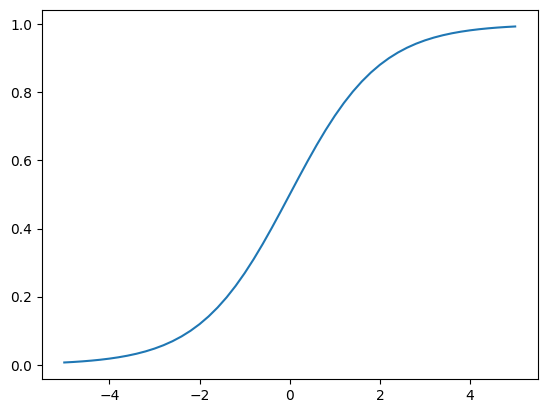

In [53]:
plt.plot(z,sigmoid(z))

In [55]:
def linear_regression(xi):
  result = w0

  for j in range(len(w)):
    result = result+ xi[j]*w[j]
  return result

In [56]:
def logistic_regression(xi):
  score = w0

  for j in range(len(w)):
    score = score+ xi[j]*w[j]
  result = sigmoid(score)
  return result

## 3.10 - Training Logistic Regression with Scikit-Learn

In [79]:
from sklearn.linear_model import LogisticRegression

In [102]:
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [103]:
model.intercept_[0]

-0.1088935835655855

In [105]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.029, -0.079,  0.063, -0.089, -0.082,
       -0.034, -0.073, -0.336,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.01 ,  0.063, -0.089, -0.082,  0.266, -0.089, -0.285, -0.232,
        0.124, -0.165,  0.058, -0.087, -0.032,  0.071, -0.059,  0.141,
       -0.249,  0.216, -0.121, -0.089,  0.102, -0.071, -0.089,  0.052,
        0.214, -0.089, -0.233, -0.071,  0.   ])

In [111]:
y_pred= model.predict_proba(X_val)[:,1]

In [112]:
churn_decision = (y_pred >0.5)

In [113]:
churn_decision

array([False, False, False, ..., False,  True,  True])

In [114]:
(y_val==churn_decision).mean()

0.8034066713981547

In [115]:
df_pred = pd.DataFrame()
df_pred['probability']= y_pred
df_pred['decision']=churn_decision.astype(int)
df_pred['actual']=y_val

In [116]:
df_pred['correct']= (df_pred.actual==df_pred.decision)

In [117]:
df_pred.correct.mean()

0.8034066713981547

## 3.11 - Model Interpretation

In [142]:
small=['contract','tenure','monthlycharges']

In [143]:
df_train[small]

,contract,tenure,monthlycharges
0,two_year,72,115.50
1,month-to-month,10,95.25
2,month-to-month,5,75.55
3,month-to-month,5,80.85
4,two_year,18,20.10
...,...,...,...
4220,one_year,52,80.85
4221,month-to-month,18,25.15
4222,month-to-month,2,90.00
4223,two_year,27,24.50


In [128]:
dict_train_small = df_train[small].to_dict(orient='records')

In [129]:
dict_val_small = df_val[small].to_dict(orient='records')

In [130]:
dv_small = DictVectorizer(sparse=False)

In [147]:
X_small_train= dv_small.fit_transform(dict_train_small)

In [148]:
X_small_val = dv_small.transform(dict_val_small)

In [133]:
model_small= LogisticRegression()

In [149]:
model_small.fit(X_small_train, y_train)

LogisticRegression()

In [150]:
w0 = model_small.intercept_[0]
w0

-2.4767756620596773

In [151]:
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [152]:
w_dict= dict(zip(dv_small.get_feature_names_out(),w.round(3)))

In [146]:
w_dict

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [153]:
y_pred_small = model_small.predict_proba(X_small_val)[:, 1]


## 3.12 - Using the Model

In [154]:
dicts_full_train= df_full_train[numerical+categorical].to_dict(orient='records')
dicts_test= df_test[numerical+categorical].to_dict(orient='records')

In [155]:
dv = DictVectorizer(sparse=False)

In [156]:
X_full_train= dv.fit_transform(dicts_full_train)

In [157]:
X_test = dv.transform(dicts_test)

In [158]:
y_full_train = df_full_train.churn.values

In [159]:
model = LogisticRegression().fit(X_full_train,y_full_train)

In [160]:
y_pred = model.predict_proba(X_test)[:,1]

In [161]:
churn_decision = y_pred>0.5

In [163]:
(churn_decision==y_test).mean()

0.815471965933286

In [164]:
customer = dicts_test[10]

In [168]:
customer

{'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45,
 'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check'}

In [165]:
X_customer = dv.transform([customer])

In [169]:
y_pred_customer = model.predict_proba(X_customer)[0,1]

In [170]:
y_pred_customer

0.405681097787929